In [1]:
import os
import re
import random
from io import BytesIO
from zipfile import ZipFile

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Markdown, Audio

archive_path = '../data/raw_data.zip'
dir_path = '../data/raw_data'

## Data structure

There are 2 functions provided to read multiple `*.csv` files from archive or directory

In [2]:
def read_archive(archive_path):
    series = {}

    with ZipFile(archive_path, 'r') as archive:
        for entry in archive.filelist:
            if not entry.is_dir():
                dirname, filename = entry.filename.split('/')
                filename = int(re.sub(r'\D', '', filename))

                with archive.open(entry.filename, 'r') as f:
                    buffer = BytesIO(f.read())

                series[(dirname, filename)] = pd.read_csv(
                    buffer,
                    header=None,
                    sep=';',
                    usecols=[0],
                    squeeze=True
                )

    return pd.DataFrame.from_dict(series)


def read_dir(dir_path):
    series = {}

    for root, dirs, files in os.walk(dir_path):
        for entry in files:
            dirname = root.split(os.path.sep)[-1]
            filename = int(re.sub(r'\D', '', entry))

            series[(dirname, filename)] = pd.read_csv(
                os.path.join(root, entry),
                header=None,
                sep=';',
                usecols=[0],
                squeeze=True
            )

    return pd.DataFrame.from_dict(series)

In [3]:
df = read_archive(archive_path)
# df = read_dir(dir_path)

In [4]:
df.columns.names = ['state', 'sample']
df.index.names = ['frame']
df

state  cylinder_1st_off_is0                                                  \
sample                   1           10          11          12          13   
frame                                                                         
0                294.027565  289.957211  290.322581  291.793313  291.424235   
1                292.906178  290.835648  291.424235  291.276865  291.867241   
2                294.629156  291.571754  292.608585  291.867241  290.030211   
3                294.629156  291.424235  293.727690  291.867241  290.030211   
4                294.553823  292.089249  292.682927  292.608585  289.665577   
5                293.727690  292.015209  291.203236  293.428426  288.866600   
6                294.177732  292.015209  291.793313  295.006402  289.519980   
7                295.308895  292.089249  293.055202  294.102630  291.719423   
8                295.081967  291.941206  293.129771  294.629156  292.608585   
9                295.460374  290.909091  292.608585  292.980671  291.793313   
10               296.372524  291.645570  292.608585  292.682927  291.571754   
11               294.403271  292.089249  292.682927  291.941206  289.957211   
12               294.177732  292.015209  291.719423  291.645570  290.688872   
13               295.839753  291.276865  291.276865  292.237443  292.385787   
14               294.930876  291.203236  292.089249  293.652817  292.385787   
15               293.952539  291.571754  293.503185  294.177732  291.424235   
16               293.279022  291.645570  293.952539  292.534281  289.301858   
17               294.478528  290.982571  292.089249  290.103249  288.577154   
18               294.629156  290.395765  290.395765  289.374529  291.719423   
19               293.952539  290.615540  291.941206  291.793313  293.428426   
20               292.015209  291.793313  294.930876  293.204378  294.403271   
21               292.237443  290.909091  295.157571  296.143959  293.279022   
22               294.553823  291.645570  294.478528  296.677826  291.571754   
23               295.536172  295.006402  294.704528  295.308895  291.203236   
24               293.279022  295.915746  293.952539  289.301858  291.497976   
25               291.867241  295.308895  291.350531  288.144072  292.311596   
26               291.276865  294.252874  291.941206  293.353705  292.311596   
27               293.428426  294.027565  294.553823  297.597520  291.203236   
28               297.982411  294.779939  296.907216  294.855388  291.129644   
29               298.755187  294.704528  295.384615  292.015209  291.350531   
...                     ...         ...         ...         ...         ...   
1220             292.163327  293.727690  293.577982  291.203236  291.424235   
1221             293.577982  297.136962  294.403271  291.203236  291.867241   
1222             296.448791  297.213622  294.027565  291.571754  292.460015   
1223             295.384615  292.906178  292.831723  291.056089  292.311596   
1224             292.980671  291.719423  292.534281  291.056089  291.867241   
1225             292.089249  292.906178  292.163327  291.276865  290.688872   
1226             293.279022  292.831723  293.279022  291.571754  288.432649   
1227             292.311596  291.793313  292.237443  291.497976  287.281796   
1228             293.204378  291.129644  291.129644  290.909091  287.138584   
1229             294.177732  290.835648  292.757306  287.928018  289.811321   
1230             296.220108  291.129644  293.279022  288.577154  291.719423   
1231             295.308895  291.645570  293.279022  290.030211  289.592760   
1232             294.629156  290.468986  292.534281  290.835648  287.784162   
1233             293.353705  289.957211  291.424235  292.980671  291.645570   
1234             292.980671  289.156627  290.909091  294.177732  296.754250   
1235             292.534281  291.056089  292.089249  293.055202  297.520661   
1236             292.089249  291.719423  293.27902

We remove samples where not full cycle was presented in file

In [5]:
df \
    .T \
    .dropna() \
    .groupby(level=0) \
    .apply(lambda g: sorted(g.index.get_level_values(1))) \
    .apply(lambda x: set(range(1, len(x))) - set(x))

state
cylinder_1st_off_is0      {}
cylinder_1st_off_is1      {}
cylinder_2nd_off_is0      {}
cylinder_2nd_off_is1      {}
cylinder_3rd_off_is0      {}
cylinder_4th_off_is0      {}
cylinder_4th_off_is1     {7}
cylinder_5th_off_is0      {}
cylinder_6th_off_is0      {}
cylinder_6th_off_is1      {}
good_0                    {}
good_1                    {}
good_2                    {}
good_3                  {53}
good_300kWt_0             {}
good_300kWt_1             {}
good_4                  {76}
good_5                    {}
dtype: object

In [6]:
df = df.dropna(axis='columns')

In [7]:
df.shape

(1250, 1551)

In [8]:
df.T.groupby(level=0).size()

state
cylinder_1st_off_is0     59
cylinder_1st_off_is1     50
cylinder_2nd_off_is0     80
cylinder_2nd_off_is1     50
cylinder_3rd_off_is0     80
cylinder_4th_off_is0     69
cylinder_4th_off_is1     49
cylinder_5th_off_is0     57
cylinder_6th_off_is0     82
cylinder_6th_off_is1     50
good_0                  113
good_1                   80
good_2                   67
good_3                  117
good_300kWt_0           146
good_300kWt_1           237
good_4                  106
good_5                   59
dtype: int64

In case if you want to extract full data as single csv file

In [9]:
# df.to_csv('../data/data.csv')

In [10]:
seq_df = df \
    .T \
    .dropna() \
    .sort_index() \
    .unstack(level=1) \
    .T \
    .swaplevel() \
    .sort_index()

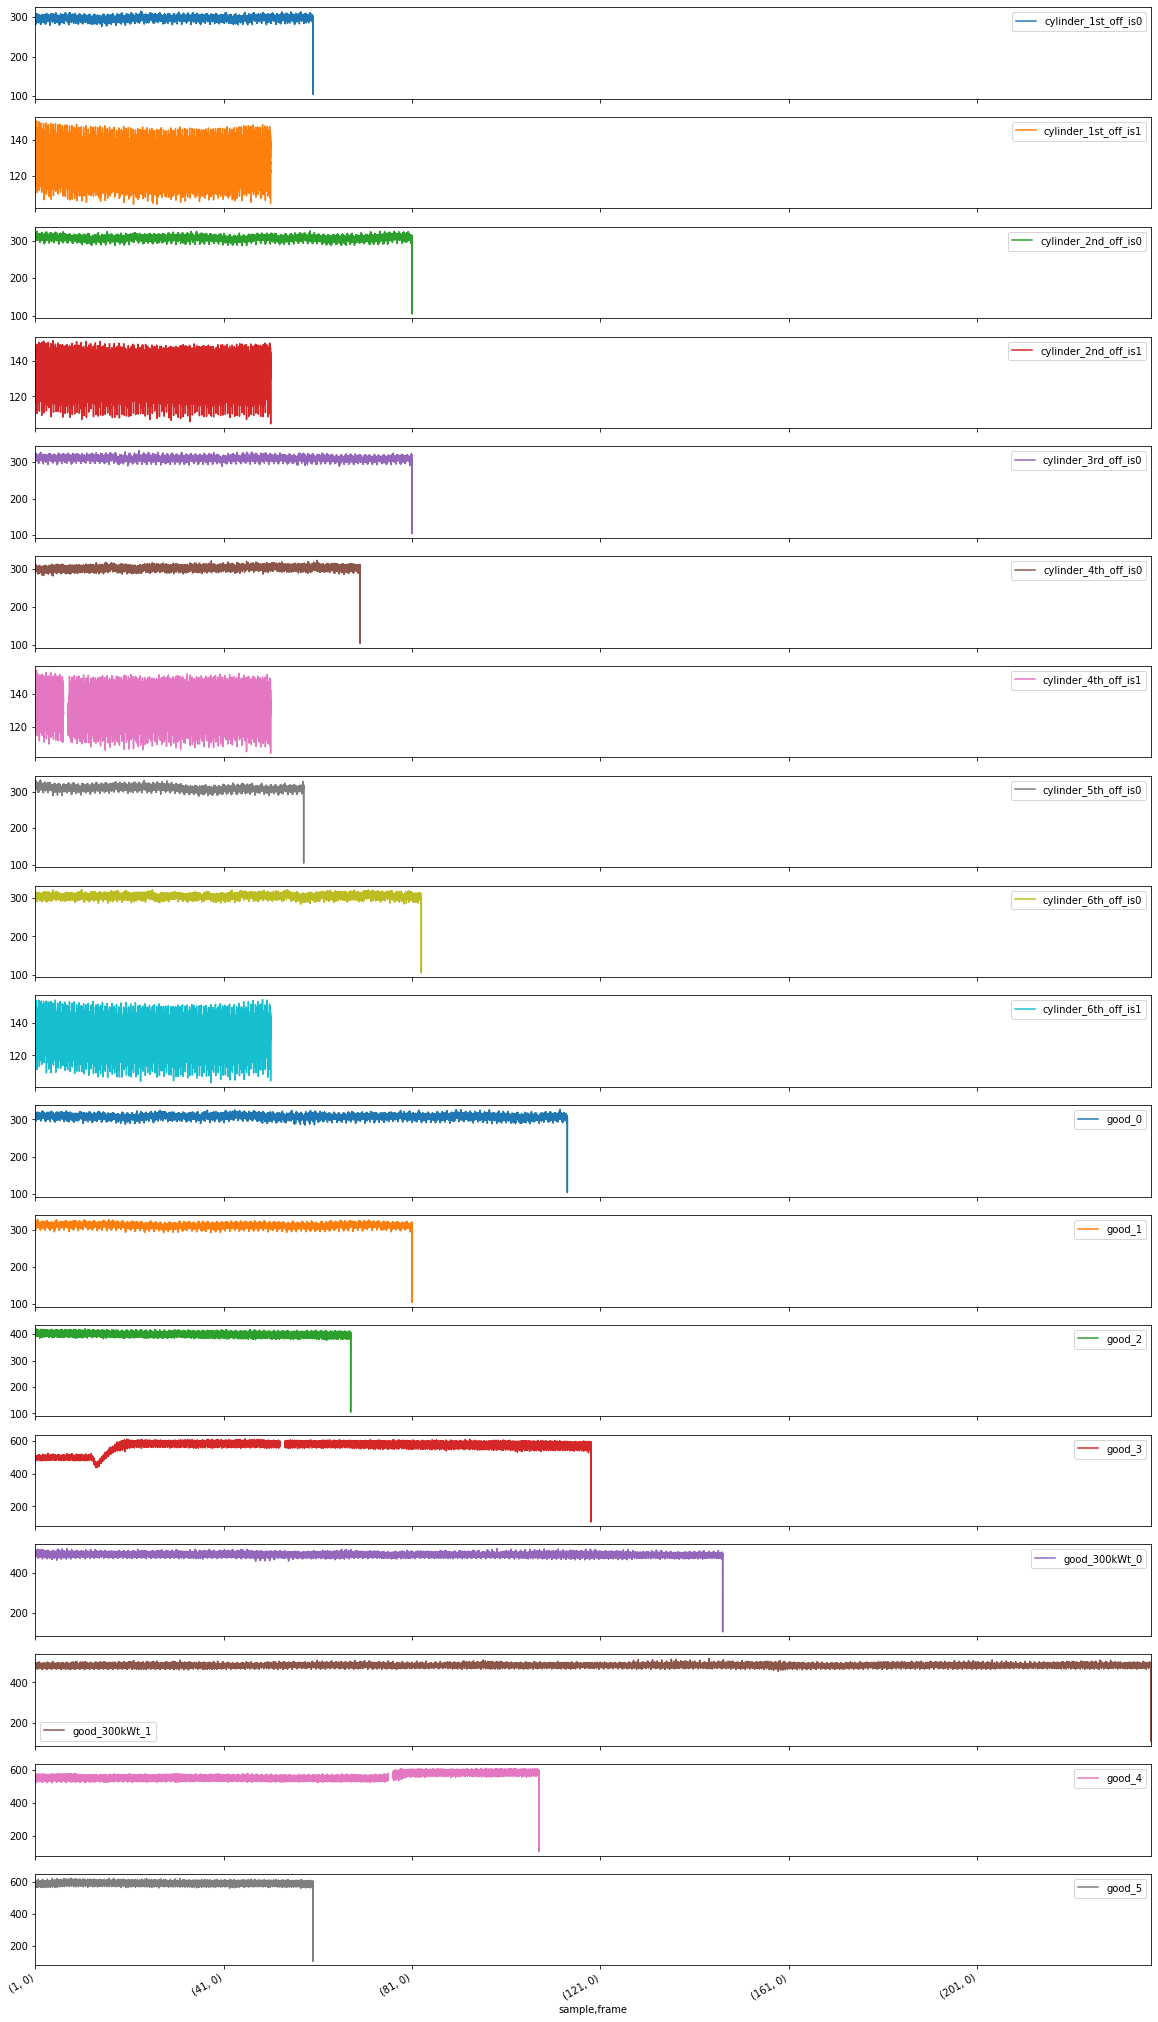

In [11]:
_ = seq_df.plot(subplots=True, figsize=(20, 40))

There few issues with the date which clearly we can see in the plot above: gaps (we deleted not full files), sharp leap, tails at the end of each graph

## Clear expriments

All experiment have leap at the end, so we remove last 1250 ticks

In [12]:
seq_df = seq_df.apply(lambda s: s.drop(s.dropna().index.get_level_values(0)[-1]))

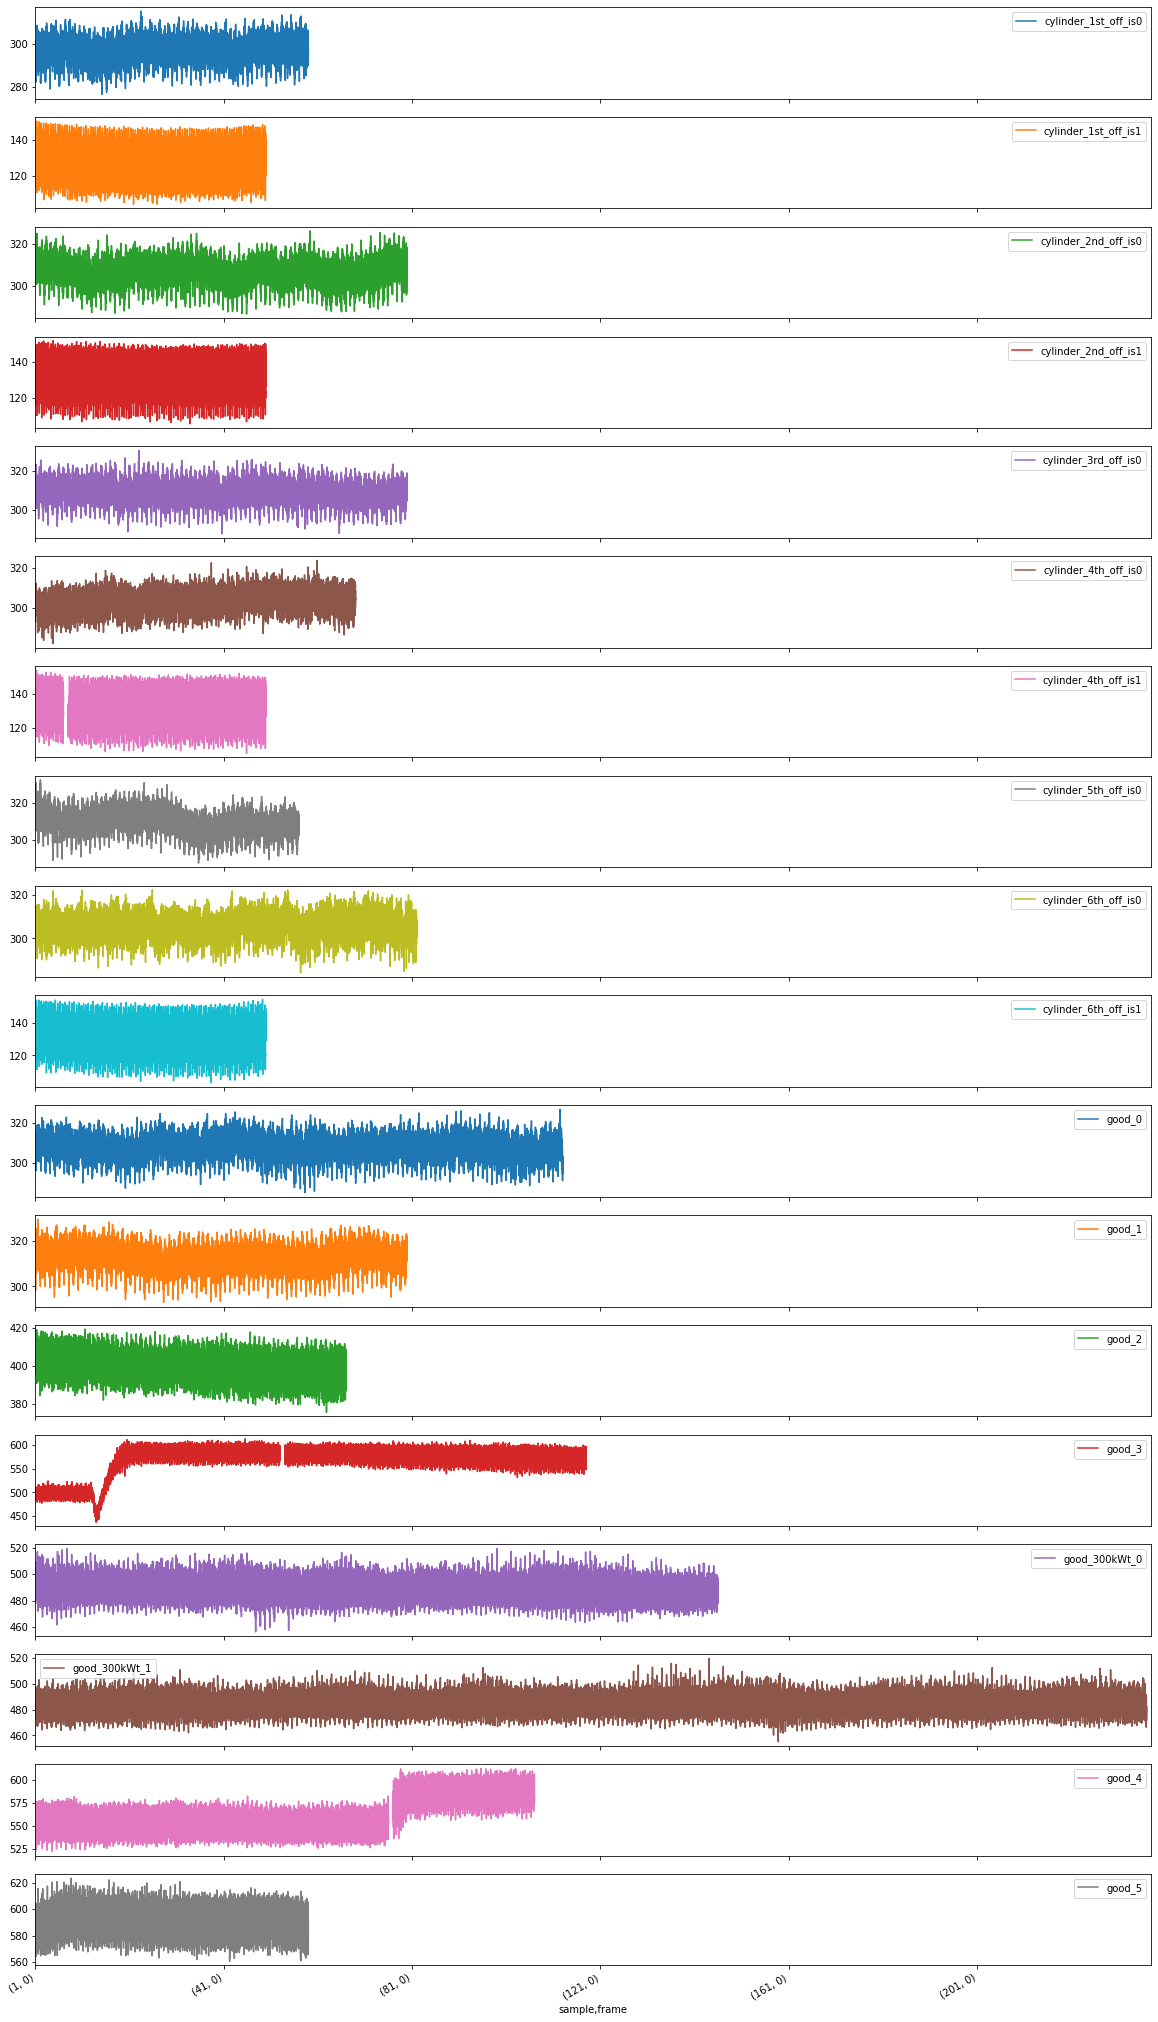

In [13]:
_ = seq_df.plot(subplots=True, figsize=(20, 40))

`cylinder_4th_off_1`, `good_3`and `good_4` has a gap in sequence of continues signal so it will be sliced by the gap into different experiments.

In [14]:
split_index = seq_df['cylinder_4th_off_is1'][seq_df['cylinder_4th_off_is1'].isnull()].index[0]
seq_df['cylinder_4th_off_is1_1'] = seq_df.loc[split_index:, 'cylinder_4th_off_is1']
seq_df['cylinder_4th_off_is1'] = seq_df.loc[:split_index, 'cylinder_4th_off_is1']

In [15]:
split_index = seq_df['good_3'][seq_df['good_3'].isnull()].index[0]
seq_df['good_6'] = seq_df.loc[split_index:, 'good_3']
seq_df['good_3'] = seq_df.loc[:split_index, 'good_3']

In [16]:
split_index = seq_df['good_4'][seq_df['good_4'].isnull()].index[0]
seq_df['good_7'] = seq_df.loc[split_index:, 'good_4']
seq_df['good_4'] = seq_df.loc[:split_index, 'good_4']

`good_3` has sharp leap be which we split the experiment into two experiments

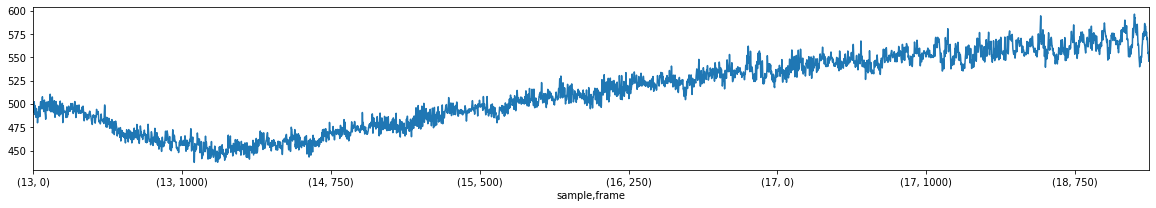

In [17]:
_ = seq_df['good_3'].dropna().loc[13:18].plot(figsize=(20, 3))

In [18]:
seq_df['good_8'] = seq_df['good_3'].loc[20:]
seq_df['good_3'] = seq_df['good_3'].loc[:12]

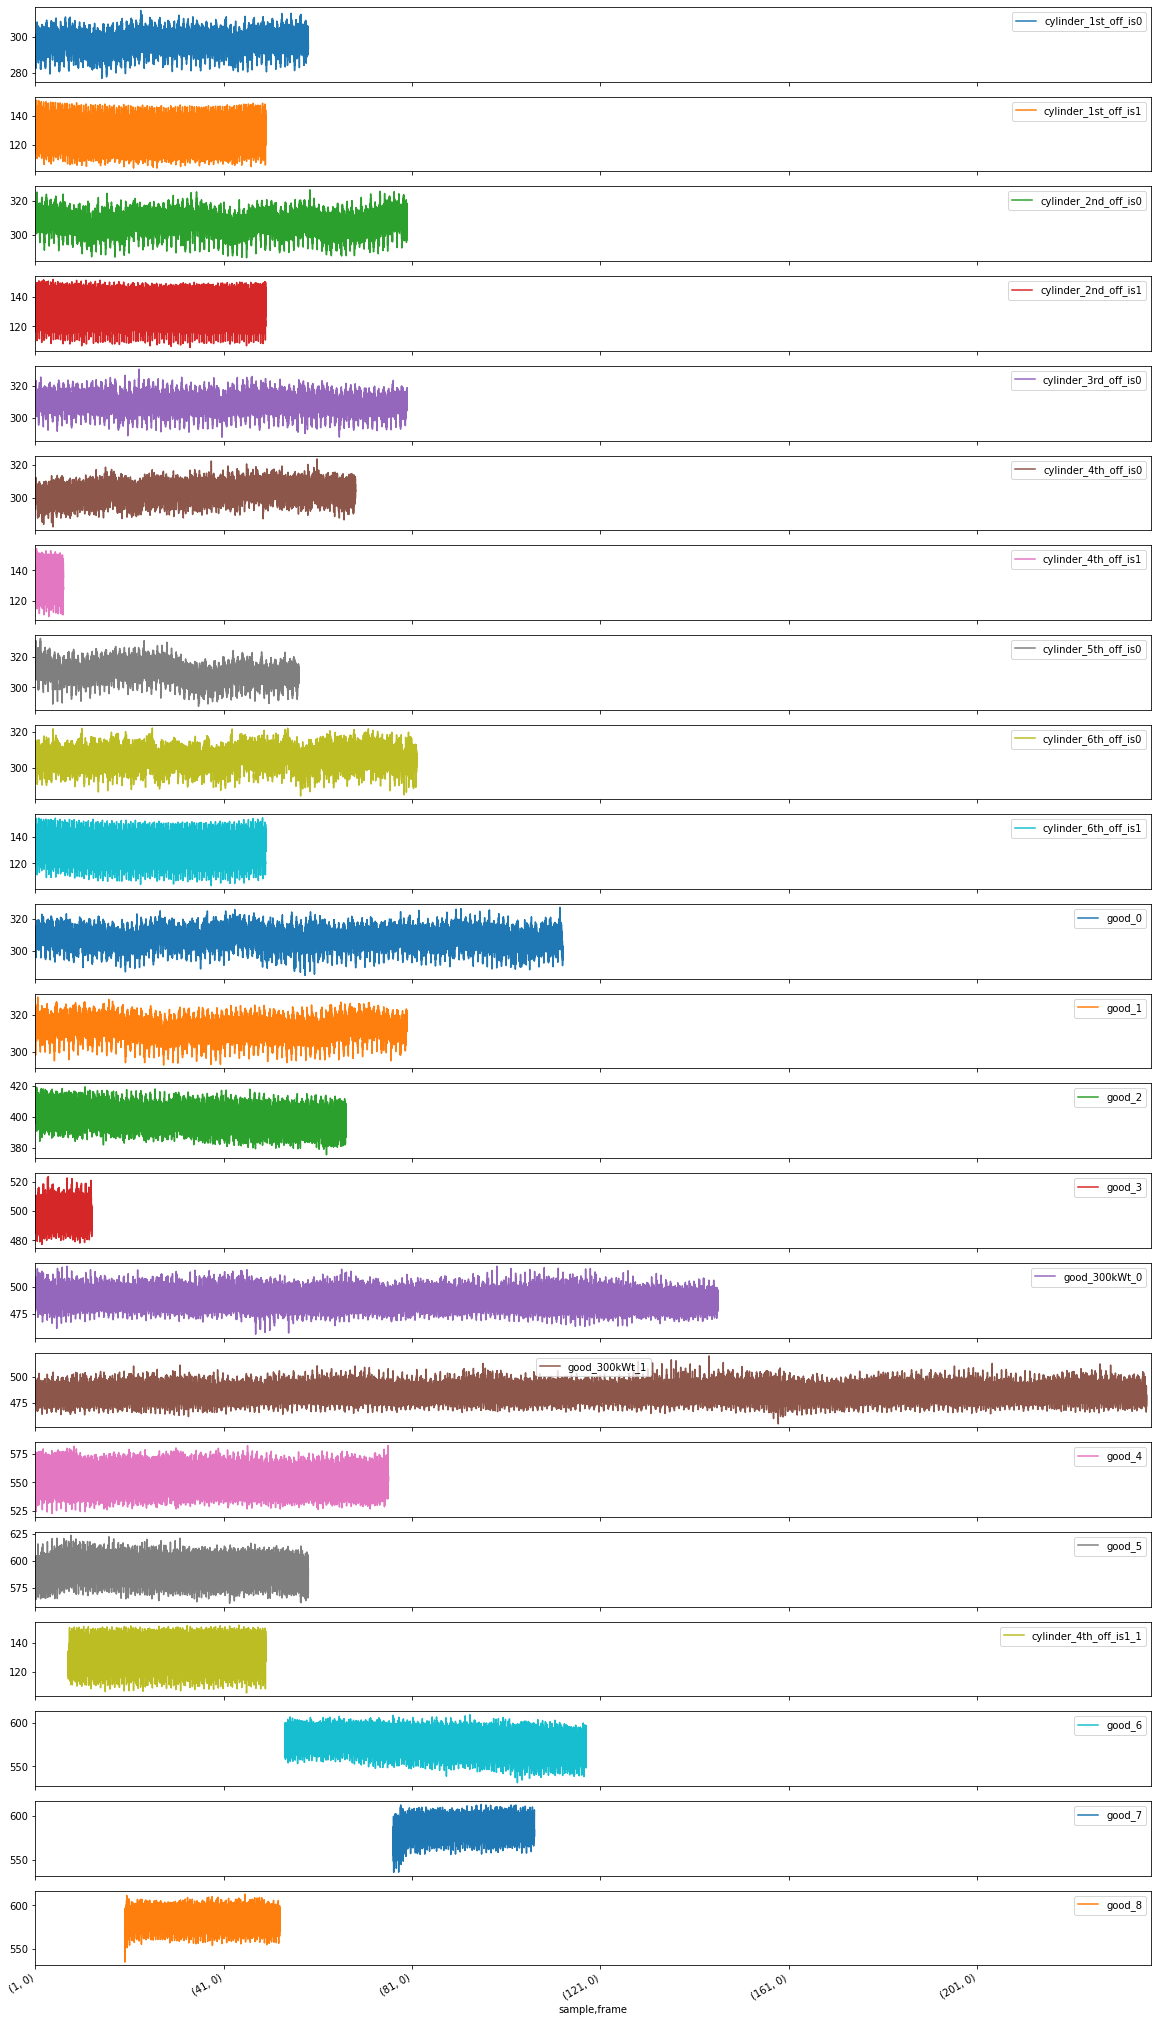

In [19]:
_ = seq_df.plot(subplots=True, figsize=(20, 40))

Now we can prepare final dataset for our application. We prepared 2: consecutive sliced samples dataset and randomly sliced dataset.
The second one maybe will be better on modeling stage to avoid overfitting.

## Data transformation

### Consequtive signal
Signals sliced like they were recorded

In [20]:
cont_df = seq_df.T.stack(level=0).dropna()

In [21]:
cont_df

frame                              0           1           2           3     \
state                sample                                                   
cylinder_1st_off_is0 1       294.027565  292.906178  294.629156  294.629156   
                     2       292.460015  293.503185  293.503185  293.652817   
                     3       293.577982  293.577982  294.102630  295.157571   
                     4       291.497976  291.867241  291.129644  291.571754   
                     5       292.015209  293.055202  294.027565  293.428426   
                     6       291.571754  291.941206  290.909091  289.229224   
                     7       293.727690  293.279022  292.831723  291.645570   
                     8       290.688872  291.129644  291.276865  291.571754   
                     9       293.129771  293.877551  292.831723  292.608585   
                     10      289.957211  290.835648  291.571754  291.424235   
                     11      290.322581  291.424235  292.608585  293.727690   
                     12      291.793313  291.276865  291.867241  291.867241   
                     13      291.424235  291.867241  290.030211  290.030211   
                     14      292.682927  294.252874  292.682927  290.762241   
                     15      292.980671  293.503185  291.867241  289.301858   
                     16      292.682927  291.203236  290.688872  290.103249   
                     17      292.608585  292.757306  294.102630  294.553823   
                     18      290.909091  290.030211  291.056089  290.835648   
                     19      294.027565  293.428426  294.629156  295.081967   
                     20      292.757306  292.385787  292.311596  291.941206   
                     21      297.136962  293.652817  295.006402  297.290323   
                     22      295.006402  298.522933  300.234558  298.059508   
                     23      300.234558  299.454120  300.704777  300.626305   
                     24      295.157571  296.067849  296.830714  297.213622   
                     25      300.156331  299.765808  298.677729  298.677729   
                     26      295.233214  296.601442  297.905353  298.136646   
                     27      298.368298  299.687825  302.521008  300.312826   
                     28      294.478528  295.384615  295.839753  295.612009   
                     29      300.626305  298.987802  298.213823  299.376299   
                     30      302.998422  300.234558  297.367062  296.067849   
...                                 ...         ...         ...         ...   
good_8               23      588.055130  589.559877  588.055130  587.155963   
                     24      584.474886  586.856852  587.455380  586.259542   
                     25      582.701062  583.586626  583.291139  580.060423   
                     26      568.608095  569.732938  570.862240  570.297030   
                     27      574.563591  578.023081  577.733200  574.563591   
                     28      578.603717  577.733200  574.563591  569.732938   
                     29      585.961343  581.818182  577.154309  576.000000   
                     30      585.663447  584.178499  581.818182  588.055130   
                     31      591.983556  590.769231  594.734125  596.273292   
                     32      589.559877  591.679507  598.441558  602.195504   
                     33      599.687663  597.820446  595.656670  594.120681   
                     34      589.861751  588.055130  587.155963  588.656106   
                     35      581.231080  585.663447  590.163934  592.287918   
                     36      567.767373  572.849329  577.733200  580.937973   
                     37      580.352645  575.424575  568.888889  565.260059   
                     38      579.768495  571.145265  565.260059  564.152791   
                     39      565.260059  570.579495  582.701062  584.771574   
                     40      582.406471  583.58662

In [22]:
cont_df.groupby(level=0).size()

state
cylinder_1st_off_is0       58
cylinder_1st_off_is1       49
cylinder_2nd_off_is0       79
cylinder_2nd_off_is1       49
cylinder_3rd_off_is0       79
cylinder_4th_off_is0       68
cylinder_4th_off_is1        6
cylinder_4th_off_is1_1     42
cylinder_5th_off_is0       56
cylinder_6th_off_is0       81
cylinder_6th_off_is1       49
good_0                    112
good_1                     79
good_2                     66
good_3                     12
good_300kWt_0             145
good_300kWt_1             236
good_4                     75
good_5                     58
good_6                     64
good_7                     30
good_8                     33
dtype: int64

In [23]:
cont_df.index = cont_df.index.get_level_values(0).str.replace(r'_\d$', '')

In [24]:
cont_df = cont_df \
    .groupby(level=0) \
    .apply(lambda g: g.reset_index(drop=True)) \

In [25]:
cont_df.groupby(level=0).size()

state
cylinder_1st_off_is0     58
cylinder_1st_off_is1     49
cylinder_2nd_off_is0     79
cylinder_2nd_off_is1     49
cylinder_3rd_off_is0     79
cylinder_4th_off_is0     68
cylinder_4th_off_is1     48
cylinder_5th_off_is0     56
cylinder_6th_off_is0     81
cylinder_6th_off_is1     49
good                    529
good_300kWt             381
dtype: int64

In [26]:
cont_df['class'] = cont_df.apply(lambda s: 'good' if s.name[0].startswith('good') else 'bad', axis=1)
cont_df = cont_df.set_index('class', append=True).reorder_levels([2, 0, 1])

In [27]:
cont_df.groupby(level=0).size()

class
bad     616
good    910
dtype: int64

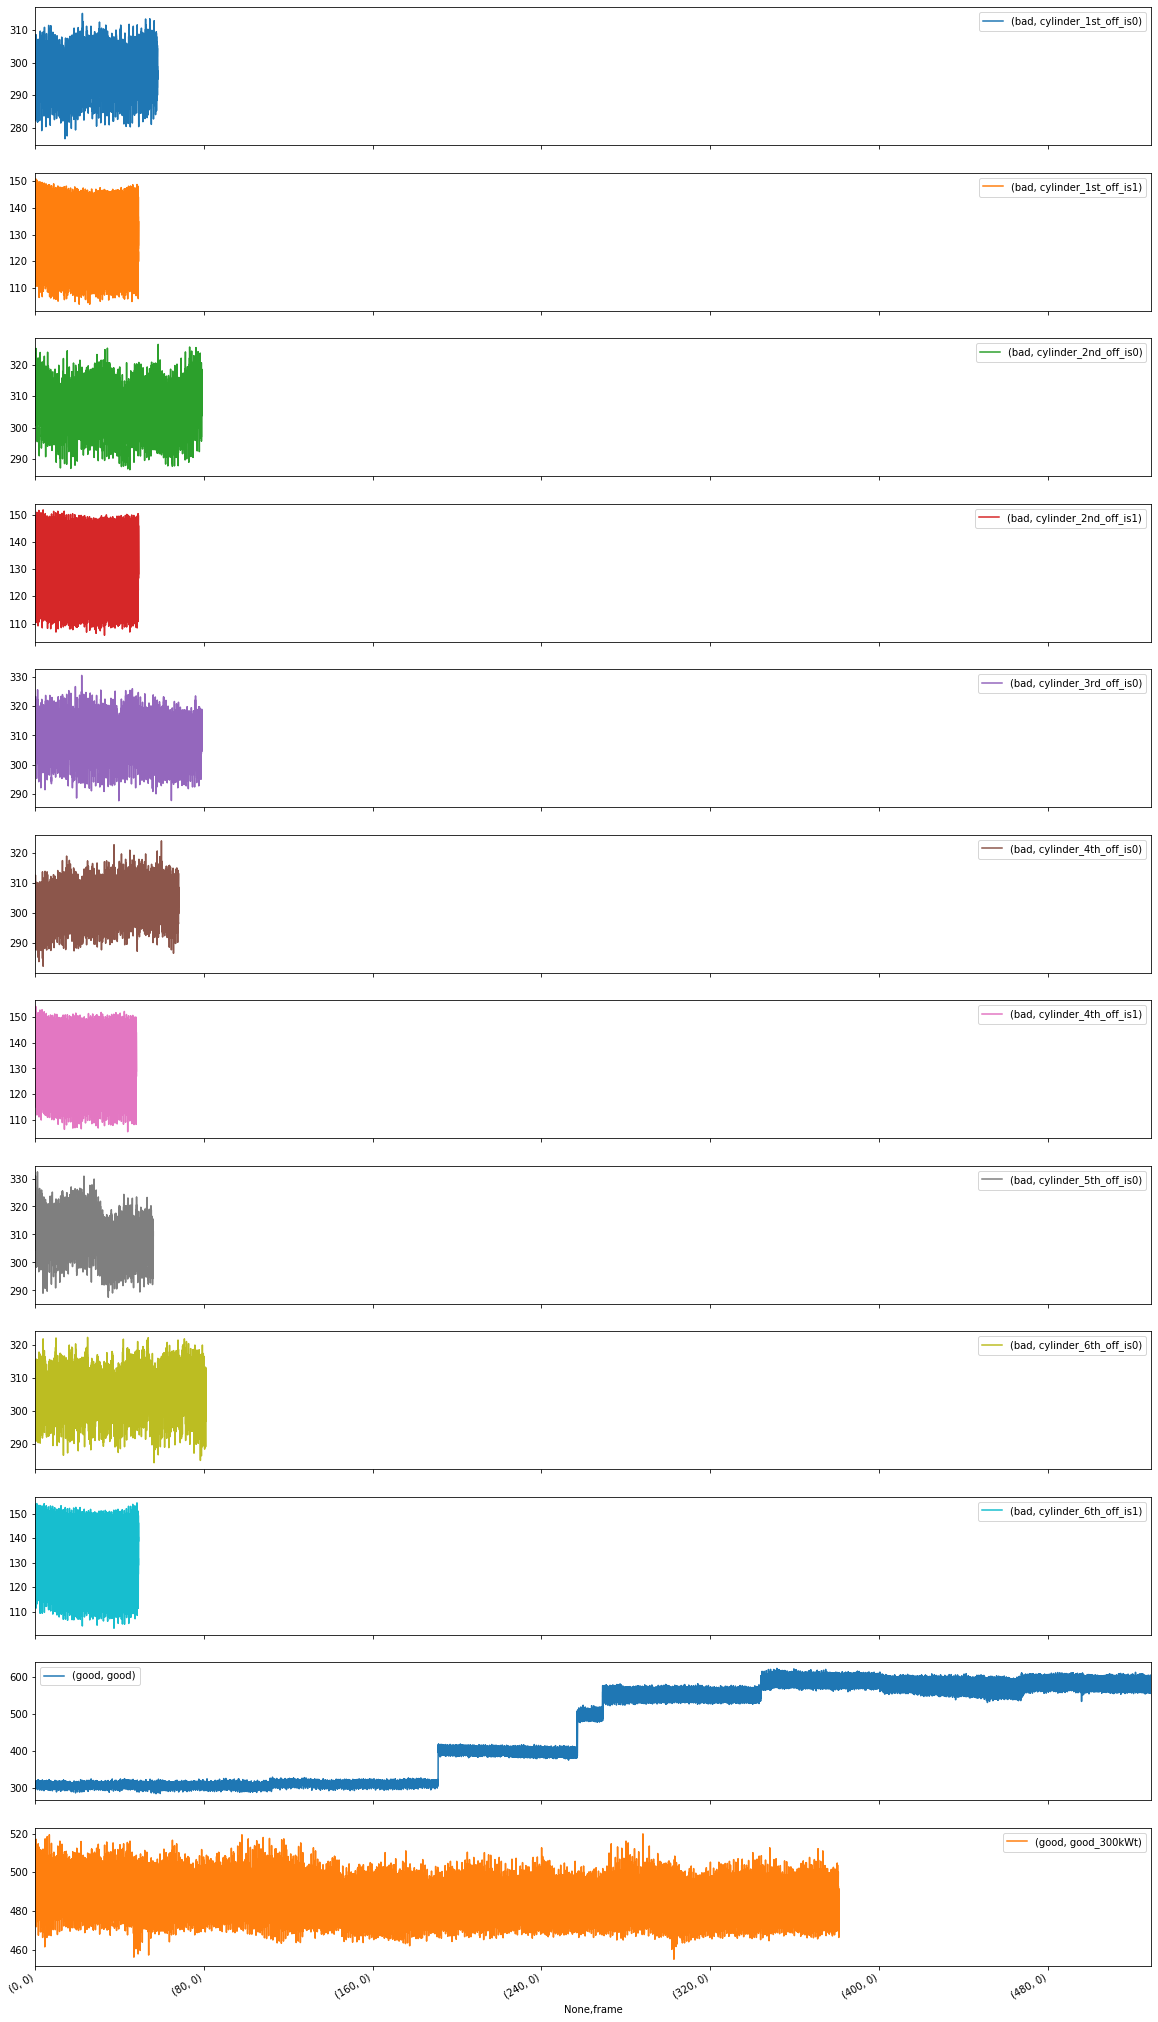

In [28]:
_ = cont_df.unstack(level=2).swaplevel(axis=1).sort_index(axis=1).T.plot(subplots=True, figsize=(20, 40))

In [29]:
cont_df.index.levels[2].name = 'sample'

In [30]:
# cont_df.to_csv('../data/db.csv')

### Random sliced signal
Continuous signal slice in random way from to have different phases

In [31]:
max_step = 200

rnd_df = seq_df \
    .reset_index(drop=True) \
    .groupby(np.arange(len(seq_df)) // (1250 + max_step)) \
    .apply(lambda g: g.iloc[random.randint(0, max_step):].head(1250).reset_index(drop=True)) \
    .T \
    .stack(level=0) \
    .dropna()


In [32]:
rnd_df

0           1           2           3     \
state                                                                     
cylinder_1st_off_is0 0   296.296296  298.291041  297.060340  295.460374   
                     1   299.143080  296.907216  295.384615  295.384615   
                     2   295.763800  297.443842  297.520661  295.763800   
                     3   302.600473  301.886792  302.600473  302.679979   
                     4   294.102630  294.328053  294.328053  295.081967   
                     5   293.428426  292.089249  292.385787  294.779939   
                     6   285.431120  281.731475  290.982571  304.761905   
                     7   295.687885  300.469484  299.531981  294.403271   
                     8   298.832685  301.176471  301.334031  300.704777   
                     9   300.234558  301.728654  300.156331  297.751357   
                     10  285.219114  287.067032  290.176322  293.353705   
                     11  300.940439  300.783290  299.921895  299.531981   
                     12  292.906178  292.906178  292.237443  289.884248   
                     13  294.252874  290.468986  288.216162  289.665577   
                     14  299.065421  297.213622  297.751357  300.626305   
                     15  298.910223  299.143080  298.522933  298.445596   
                     16  297.290323  297.060340  296.983759  297.751357   
                     17  293.652817  294.704528  296.220108  293.428426   
                     18  299.921895  298.136646  298.291041  302.679979   
                     19  289.301858  287.928018  289.084065  292.237443   
                     20  295.839753  295.157571  296.830714  297.751357   
                     21  311.099109  307.610147  304.439746  305.976096   
                     22  295.006402  294.855388  294.704528  294.177732   
                     23  295.157571  294.478528  296.372524  298.291041   
                     24  295.612009  297.597520  300.861844  299.376299   
                     25  290.322581  291.571754  291.645570  291.129644   
                     26  301.965924  299.609883  298.213823  299.921895   
                     27  302.124312  303.877605  301.649647  300.547874   
                     28  304.520222  304.681301  303.237694  302.759527   
                     29  295.763800  296.983759  297.213622  296.372524   
...                             ...         ...         ...         ...   
good_7               88  585.365854  587.455380  588.055130  587.755102   
                     89  574.563591  573.991031  576.288144  580.352645   
                     90  598.441558  596.891192  594.427245  590.163934   
good_8               17  587.455380  588.656106  588.656106  585.961343   
                     18  590.163934  585.068563  576.000000  568.608095   
                     19  584.178499  583.586626  586.259542  587.755102   
                     20  583.586626  583.586626  581.231080  578.313253   
                     21  576.000000  575.137294  576.865298  579.476861   
                     22  574.277168  573.419612  575.712144  578.313253   
                     23  602.825746  603.141361  601.566580  600.000000   
                     24  587.455380  582.701062  580.645161  582.406471   
                     25  574.277168  575.424575  577.733200  578.894472   
                     26  585.961343  590.466427  588.656106  580.937973   
                     27  590.163934  586.856852  585.365854  586.558045   
                     28  603.773585  597.200622  586.259542  580.645161   
                     29  580.645161  579.185520  576.000000  578.023081   
                     30  585.663447  586.259542  587.755102  585.365854   
                     31  567.487685  569.169960  569.169960  570.862240   
                     32  577.154309  572.849329  570.297030  570.014844   
                     33  589.258312  590.163934  594.427245  598.441558   
                     34  581.818182  581.231080  582.112

In [33]:
rnd_df.groupby(level=0).size()

state
cylinder_1st_off_is0       50
cylinder_1st_off_is1       42
cylinder_2nd_off_is0       68
cylinder_2nd_off_is1       42
cylinder_3rd_off_is0       68
cylinder_4th_off_is0       58
cylinder_4th_off_is1        5
cylinder_4th_off_is1_1     36
cylinder_5th_off_is0       48
cylinder_6th_off_is0       69
cylinder_6th_off_is1       42
good_0                     96
good_1                     68
good_2                     56
good_3                     10
good_300kWt_0             125
good_300kWt_1             203
good_4                     64
good_5                     50
good_6                     54
good_7                     25
good_8                     27
dtype: int64

In [34]:
rnd_df.index = rnd_df.index.get_level_values(0).str.replace(r'_\d$', '')

In [35]:
rnd_df = rnd_df \
    .groupby(level=0) \
    .apply(lambda g: g.reset_index(drop=True)) \

In [36]:
rnd_df.groupby(level=0).size()

state
cylinder_1st_off_is0     50
cylinder_1st_off_is1     42
cylinder_2nd_off_is0     68
cylinder_2nd_off_is1     42
cylinder_3rd_off_is0     68
cylinder_4th_off_is0     58
cylinder_4th_off_is1     41
cylinder_5th_off_is0     48
cylinder_6th_off_is0     69
cylinder_6th_off_is1     42
good                    450
good_300kWt             328
dtype: int64

In [37]:
rnd_df['class'] = rnd_df.apply(lambda s: 'good' if s.name[0].startswith('good') else 'bad', axis=1)
rnd_df = rnd_df.set_index('class', append=True).reorder_levels([2, 0, 1])

In [38]:
rnd_df.groupby(level=0).size()

class
bad     528
good    778
dtype: int64

In [39]:
rnd_df.index.levels[2].name = 'sample'

In [40]:
rnd_df.to_csv('../data/db.csv')